<div style= "background-color: #913831; padding: 10px">
    <h2 style="color: white;">SENTIMENT ANALYSER USING NLP & vADER MODELS </h2>
    <p style="color: white;"> Analysing Ali Express customer reviews on electrical products</p>
</div>

### The objective of this project is to;
* To utilise an end to end solution that can extract, preprocess, analyse, and visualise customer reviews
* To build and train models that are capable of analysing these customers reviews
* To successfully deploy the best performing model for the product reviews

### To achieve the objectives:
* Scrap the product page of the e-commerce website
* Carry out text preprocessing and EDA on the dataset
* Carry out feature engineering on the dataset and visualise the frequency of words used
* Build and train the models to test our dataset
* Save the best performing models for deployment
* Deploy our model using Flask app on the local machine

## Phase One
* Importation of Libraries and Modules
* Data Overview and EDA
* Feature engineering 

In [1]:
!pip install nltk
!pip install textblob
!pip install wordcloud

## Explratory Data Analysis and Features Engineering

In [3]:
# Import required libraries

from warnings import filterwarnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter


In [4]:
# Import the data set using pd.read() function

rd = pd.read_csv(r"C:\Users\ADACHUKWU\Downloads\data.csv")

In [5]:
rd.head(5)

,Unnamed: 0,Username,Location,Total Review,Date of Experience,Content,Rating
0,0,Christopher Smith,GB,3reviews,"January 30, 2024",I have been shopping with AliExpress for some ...,4
1,1,blarp.tha.alien,AU,1review,"May 16, 2024",AliExpress is Legit a great place to find amaz...,5
2,2,Margarita Chavez Villalobos,US,3reviews,"May 13, 2024",AliExpress does pretty good on delivering SMAL...,3
3,3,Mario Alzate,US,1review,"May 18, 2024","Well, if you educate yourself just a little on...",5
4,4,AE user,US,1review,"May 04, 2024","Found some nice deals, but also ran into a sca...",5


In [5]:
# Ascertain the data types
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46100 entries, 0 to 46099
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          46100 non-null  int64 
 1   Username            46096 non-null  object
 2   Location            46088 non-null  object
 3   Total Review        46100 non-null  object
 4   Date of Experience  46100 non-null  object
 5   Content             36717 non-null  object
 6   Rating              46100 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


In [6]:
# Check the number of rows, cols
rd.shape

(46100, 7)

In [7]:
# Missing values and dealing with them
rd.isna().sum()

Unnamed: 0               0
Username                 4
Location                12
Total Review             0
Date of Experience       0
Content               9383
Rating                   0
dtype: int64

In [8]:
rd.dropna(inplace=True)

In [9]:
# Check for duplicates in the dataset
rd.duplicated().sum()

0

In [10]:
# Convert the date to pandas datetime using to_datetime() function
rd["Date of Experience"] = pd.to_datetime(rd["Date of Experience"])

In [11]:
rd.head(5)

,Unnamed: 0,Username,Location,Total Review,Date of Experience,Content,Rating
0,0,Christopher Smith,GB,3reviews,2024-01-30,I have been shopping with AliExpress for some ...,4
1,1,blarp.tha.alien,AU,1review,2024-05-16,AliExpress is Legit a great place to find amaz...,5
2,2,Margarita Chavez Villalobos,US,3reviews,2024-05-13,AliExpress does pretty good on delivering SMAL...,3
3,3,Mario Alzate,US,1review,2024-05-18,"Well, if you educate yourself just a little on...",5
4,4,AE user,US,1review,2024-05-04,"Found some nice deals, but also ran into a sca...",5


In [12]:
# Feature engineering a new feature to replace the ratings as either Positive or negaitive
rd["Sentiment"] = rd["Rating"].apply (lambda x: "Negative(<3)" if x<3 else ("Neutral(3)" if x==3 else "Positive(>3)"))

### Customers ratings (1-5) are converted to either negative, positive, and neutral depending on how many stars each customer gave the company. Less than 3 stars is negative, 3 is neutral while greater than 3 is a positive review.

In [13]:
rd.head(5)

,Unnamed: 0,Username,Location,Total Review,Date of Experience,Content,Rating,Sentiment
0,0,Christopher Smith,GB,3reviews,2024-01-30,I have been shopping with AliExpress for some ...,4,Positive(>3)
1,1,blarp.tha.alien,AU,1review,2024-05-16,AliExpress is Legit a great place to find amaz...,5,Positive(>3)
2,2,Margarita Chavez Villalobos,US,3reviews,2024-05-13,AliExpress does pretty good on delivering SMAL...,3,Neutral(3)
3,3,Mario Alzate,US,1review,2024-05-18,"Well, if you educate yourself just a little on...",5,Positive(>3)
4,4,AE user,US,1review,2024-05-04,"Found some nice deals, but also ran into a sca...",5,Positive(>3)


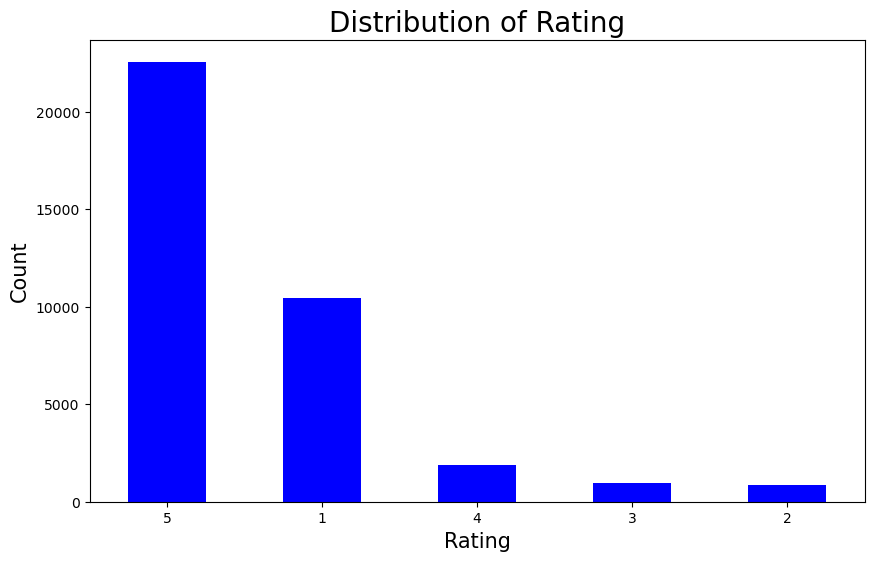

In [14]:
# Visualise the frequency of ratings in the dataset
plt.figure(figsize=(10,6))
rd["Rating"].value_counts().plot.bar(color="Blue")
plt.title("Distribution of Rating", fontsize=20)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=360)
plt.show()

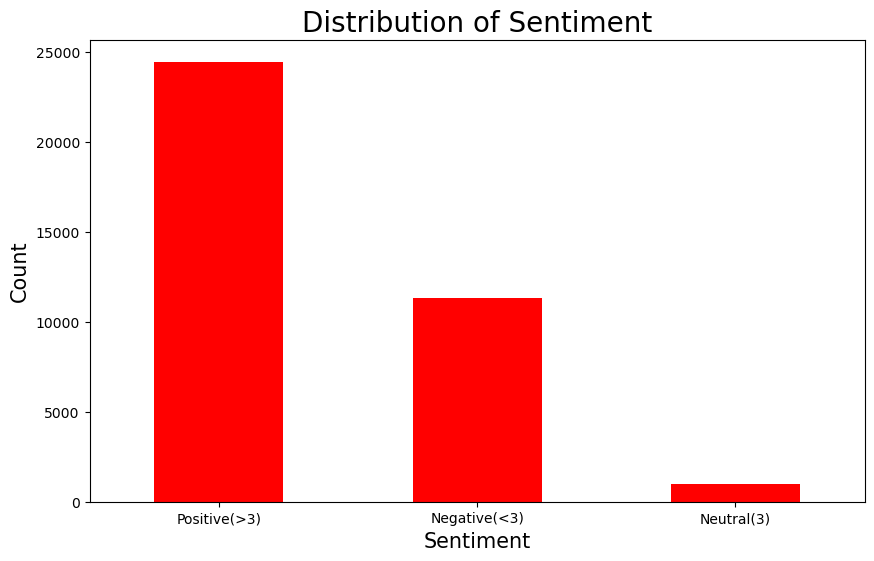

In [15]:
# Visualise the frequency of sentiments in the dataset
plt.figure(figsize=(10,6))
rd["Sentiment"].value_counts().plot.bar(color="Red")
plt.title("Distribution of Sentiment", fontsize=20)
plt.xlabel("Sentiment", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=360)
plt.show()

#### Each customer sentiment is visualised to determine the distribution of the reviews in the dataset. More than 90% of the customers gave a psoitive feedback, followed by the negative reviews. 

## Text PreProcessing
* Lower conversion
* Removal of Punctuation
* Removal of Numerical Expressions
* Removal of Stopwords
* Removal of Infrequent words
* Tokenisation
* Lemmatization

In [16]:
# Import required libraries
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from textblob import Word, TextBlob
from wordcloud import WordCloud
from PIL import Image

In [17]:
rd.head(5)

,Unnamed: 0,Username,Location,Total Review,Date of Experience,Content,Rating,Sentiment
0,0,Christopher Smith,GB,3reviews,2024-01-30,I have been shopping with AliExpress for some ...,4,Positive(>3)
1,1,blarp.tha.alien,AU,1review,2024-05-16,AliExpress is Legit a great place to find amaz...,5,Positive(>3)
2,2,Margarita Chavez Villalobos,US,3reviews,2024-05-13,AliExpress does pretty good on delivering SMAL...,3,Neutral(3)
3,3,Mario Alzate,US,1review,2024-05-18,"Well, if you educate yourself just a little on...",5,Positive(>3)
4,4,AE user,US,1review,2024-05-04,"Found some nice deals, but also ran into a sca...",5,Positive(>3)


In [18]:
# Convert the text to lower case using str.lower()

rd["Content"] = rd["Content"].str.lower()

In [19]:
rd["Content"]

0        i have been shopping with aliexpress for some ...
1        aliexpress is legit a great place to find amaz...
2        aliexpress does pretty good on delivering smal...
3        well, if you educate yourself just a little on...
4        found some nice deals, but also ran into a sca...
                               ...                        
46095    after pruchase and when payment was made, sell...
46096    if you place an order from aliexpress, as all ...
46097    i've dealt on aliexpress 11 times now and have...
46098    aliexpress failed open investigation to refund...
46099    first of all, before i ordered from this site,...
Name: Content, Length: 36706, dtype: object

#### The texts are converted to lower case to ensure uniformity of the text entry

In [20]:
# Removal of punctuations using str.replace()
rd["Content"]=rd["Content"].str.replace('[^\w\s]'," ", regex=True)

In [21]:
rd["Content"]

0        i have been shopping with aliexpress for some ...
1        aliexpress is legit a great place to find amaz...
2        aliexpress does pretty good on delivering smal...
3        well  if you educate yourself just a little on...
4        found some nice deals  but also ran into a sca...
                               ...                        
46095    after pruchase and when payment was made  sell...
46096    if you place an order from aliexpress  as all ...
46097    i ve dealt on aliexpress 11 times now and have...
46098    aliexpress failed open investigation to refund...
46099    first of all  before i ordered from this site ...
Name: Content, Length: 36706, dtype: object

#### Punctuations are removed from the texts to ensure efficient analysis by the models

In [22]:
# Removal of numerical values
rd["Content"]=rd["Content"].str.replace('\d', " ", regex=True)

In [23]:
rd["Content"]

0        i have been shopping with aliexpress for some ...
1        aliexpress is legit a great place to find amaz...
2        aliexpress does pretty good on delivering smal...
3        well  if you educate yourself just a little on...
4        found some nice deals  but also ran into a sca...
                               ...                        
46095    after pruchase and when payment was made  sell...
46096    if you place an order from aliexpress  as all ...
46097    i ve dealt on aliexpress    times now and have...
46098    aliexpress failed open investigation to refund...
46099    first of all  before i ordered from this site ...
Name: Content, Length: 36706, dtype: object

#### Numerical values are eliminated from the content column,this process enables us to focus more on our language processing and text analysis tasks. Consequently, we can concentrate solely on the textual content, allowing for meaningful data analysis.

In [24]:
# Removal of Stopwords to remove repetitve terms that are irrelevant
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Instantiate the stopwords
sw = stopwords.words("english")

In [26]:
rd["Content"] = rd["Content"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [27]:
rd["Content"]

0        shopping aliexpress time ever chose choice del...
1        aliexpress legit great place find amazing barg...
2        aliexpress pretty good delivering small items ...
3        well educate little get best benefits search f...
4        found nice deals also ran scam fake item selle...
                               ...                        
46095    pruchase payment made seller try increase pric...
46096    place order aliexpress listings posted sellers...
46097    dealt aliexpress times major problems one sell...
46098    aliexpress failed open investigation refund ev...
46099    first ordered site research saw site contained...
Name: Content, Length: 36706, dtype: object

#### Often repeated and less meaningful words are eliminated from the text to focus on words with more semantic meaning

In [28]:
# Eliminating rarewords that offer no semantics meaning to the analysis
freq_words = pd.Series(" ".join(rd["Content"]).split()).value_counts().tail(5000)

In [29]:
freq_words

adquire          1
releseated       1
cyboris          1
everencounter    1
dro              1
                ..
basin            1
washin           1
cantact          1
appease          1
xdjust           1
Name: count, Length: 5000, dtype: int64

In [30]:
# Fltering infrequent words from the content column

rd["Content"] = rd["Content"].apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))

In [31]:
rd["Content"]

0        shopping aliexpress time ever chose choice del...
1        aliexpress legit great place find amazing barg...
2        aliexpress pretty good delivering small items ...
3        well educate little get best benefits search f...
4        found nice deals also ran scam fake item selle...
                               ...                        
46095    pruchase payment made seller try increase pric...
46096    place order aliexpress listings posted sellers...
46097    dealt aliexpress times major problems one sell...
46098    aliexpress failed open investigation refund ev...
46099    first ordered site research saw site contained...
Name: Content, Length: 36706, dtype: object

#### Infrequent words that appear once in the entire dataset is removed to ensure the models focus on words with more meaning.

## Tokenzation

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
rd["Content"] = rd["Content"].apply(word_tokenize)

In [35]:
rd["Content"]

0        [shopping, aliexpress, time, ever, chose, choi...
1        [aliexpress, legit, great, place, find, amazin...
2        [aliexpress, pretty, good, delivering, small, ...
3        [well, educate, little, get, best, benefits, s...
4        [found, nice, deals, also, ran, scam, fake, it...
                               ...                        
46095    [pruchase, payment, made, seller, try, increas...
46096    [place, order, aliexpress, listings, posted, s...
46097    [dealt, aliexpress, times, major, problems, on...
46098    [aliexpress, failed, open, investigation, refu...
46099    [first, ordered, site, research, saw, site, co...
Name: Content, Length: 36706, dtype: object

#### Texts in the "content" columns are split into units for easy processing based on these words instead of the entire sentence

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [47]:
# Initialise the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [48]:
# Function to map POS tag to first character lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [49]:
# Function to lemmatize a list of word
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

In [50]:
# Apply the lemmatization function to "Content" column
rd["Content"] = rd["Content"].apply(lemmatize_words)

In [61]:
rd["Content"]

0        [shopping, aliexpress, time, ever, chose, choi...
1        [aliexpress, legit, great, place, find, amaze,...
2        [aliexpress, pretty, good, deliver, small, ite...
3        [well, educate, little, get, best, benefit, se...
4        [found, nice, deal, also, ran, scam, fake, ite...
                               ...                        
46095    [pruchase, payment, make, seller, try, increas...
46096    [place, order, aliexpress, listing, post, sell...
46097    [dealt, aliexpress, time, major, problem, one,...
46098    [aliexpress, fail, open, investigation, refund...
46099    [first, order, site, research, saw, site, cont...
Name: Content, Length: 36706, dtype: object

#### This step reduces each word to its base form e.g. "buying" to "buy"

## Text Visualisation
* Calculating Term Frequencies

In [64]:
tf = rd["Content"].apply(lambda x: pd.Series(x).value_counts()).sum(axis=0).reset_index()


In [66]:
tf.columns=["Words", "Frequency"]

In [67]:
tf_sorted = tf.sort_values(by="Frequency", ascending = False)

In [68]:
tf_sorted

,Words,Frequency
3,aliexpress,18401.0
13,seller,16499.0
98,order,14756.0
57,good,14273.0
4,item,12207.0
...,...,...
15401,goodsdd,1.0
15402,swing,1.0
15403,funy,1.0
4713,handband,1.0


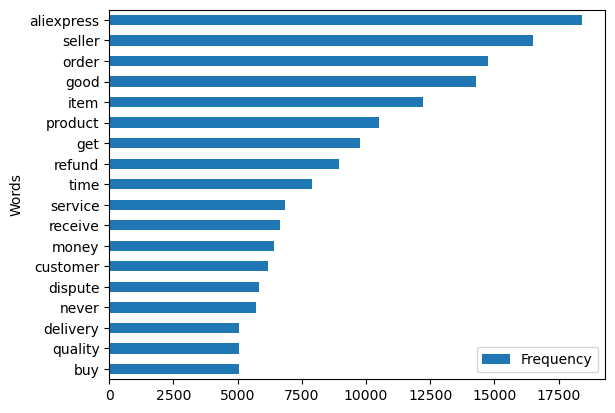

In [74]:
# Visualise in a Bar plot
# Sort the DataFrame in ascending order based on the "Frequency" column
tf_bar = tf[tf["Frequency"] > 5000].sort_values(by="Frequency", ascending=True)

# Plot the sorted DataFrame
tf_bar.plot.barh(x="Words", y="Frequency")
plt.show(block=True)


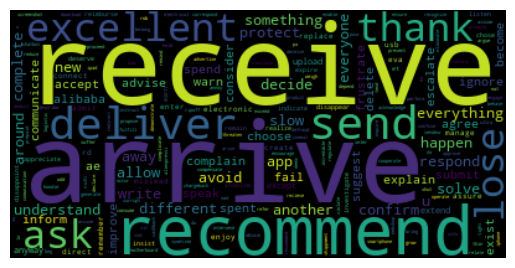

In [85]:
## Visualise the most recurring words in a wordcloud
tf_top_10000 = tf.sort_values(by="Frequency", ascending=False).head(20000)

text = " ".join(i for i in tf_top_10000["Words"])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

#### This step displays the frequently occurring words in the dataset in a visual format, clearly showing their importance and prevalence in the reviews. This allows for observation of trends and features in the text data.

## Phase Two
* Sentiment Analysis using vADER
* Machine learning algorithms (SVC, NAIVE-BAYES, LOGISTIC REGRESSION)

In [99]:
# Vader pretrained model
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADACHUKWU\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
rd["Content"] = rd["Content"].apply(lambda x: " ".join(x))

In [102]:
# Instantiate sentiment analyser
sid = SentimentIntensityAnalyzer()

In [103]:
# function to get sentiment scores
def get_sentiment(text):
    return sid.polarity_scores(text)

In [110]:
rd["Polarity_Scores"] = rd["Content"].apply(lambda x: get_sentiment(x))

In [111]:
rd["Polarity_Scores"]

0        {'neg': 0.13, 'neu': 0.753, 'pos': 0.117, 'com...
1        {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
2        {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...
3        {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
4        {'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'com...
                               ...                        
46095    {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
46096    {'neg': 0.099, 'neu': 0.813, 'pos': 0.088, 'co...
46097    {'neg': 0.298, 'neu': 0.566, 'pos': 0.136, 'co...
46098    {'neg': 0.168, 'neu': 0.769, 'pos': 0.062, 'co...
46099    {'neg': 0.129, 'neu': 0.716, 'pos': 0.155, 'co...
Name: Polarity_Scores, Length: 36706, dtype: object

#### vADER pretrained model assign polarity scores to each content depending on the emotional tone of each word. 

In [112]:
# Define the sentiment label
rd["Compound"] = rd["Polarity_Scores"].apply(lambda score_dict: score_dict['compound'])

In [113]:
rd["Compound"]

0       -0.1027
1        0.9186
2        0.8720
3        0.8924
4       -0.1280
          ...  
46095    0.3182
46096   -0.7574
46097   -0.8271
46098   -0.4939
46099    0.5699
Name: Compound, Length: 36706, dtype: float64

In [115]:
rd['SentimentLabel'] = rd['Content'].apply(
    lambda x: "Positive" if sid.polarity_scores(x)["compound"] > 0.05 else (
          "Negative" if sid.polarity_scores(x)["compound"] < -0.05 else "Neutral"))

In [116]:
rd["SentimentLabel"]

0        Negative
1        Positive
2        Positive
3        Positive
4        Negative
           ...   
46095    Positive
46096    Negative
46097    Negative
46098    Negative
46099    Positive
Name: SentimentLabel, Length: 36706, dtype: object

### The polarity scores are aggregated (compound score) to label each sentiment based on the total score. Greater than 0.05 is postive, less than -0.05 is negative, anyother score is neutral.

In [117]:
rd.head()

,Unnamed: 0,Username,Location,Total Review,Date of Experience,Content,Rating,Sentiment,Polarity_Score,Polarity_Scores,Compound,SentimentLabel
0,0,Christopher Smith,GB,3reviews,2024-01-30,shopping aliexpress time ever chose choice del...,4,Positive(>3),"{'neg': 0.13, 'neu': 0.753, 'pos': 0.117, 'com...","{'neg': 0.13, 'neu': 0.753, 'pos': 0.117, 'com...",-0.1027,Negative
1,1,blarp.tha.alien,AU,1review,2024-05-16,aliexpress legit great place find amaze bargai...,5,Positive(>3),"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...","{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9186,Positive
2,2,Margarita Chavez Villalobos,US,3reviews,2024-05-13,aliexpress pretty good deliver small item big ...,3,Neutral(3),"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...","{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.8720,Positive
3,3,Mario Alzate,US,1review,2024-05-18,well educate little get best benefit search fe...,5,Positive(>3),"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...","{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8924,Positive
4,4,AE user,US,1review,2024-05-04,found nice deal also ran scam fake item seller...,5,Positive(>3),"{'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'com...","{'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'com...",-0.1280,Negative


In [118]:
# Creating o copy of dataset for modelling
processed_df = rd.copy()

In [120]:
# Dropping irrelevant features from the dataset
processed_df.drop(columns=["Unnamed: 0", "Username", "Location", "Total Review", "Polarity_Score"], inplace=True)

In [122]:
processed_df.head(5)

,Date of Experience,Content,Rating,Sentiment,Polarity_Scores,Compound,SentimentLabel
0,2024-01-30,shopping aliexpress time ever chose choice del...,4,Positive(>3),"{'neg': 0.13, 'neu': 0.753, 'pos': 0.117, 'com...",-0.1027,Negative
1,2024-05-16,aliexpress legit great place find amaze bargai...,5,Positive(>3),"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9186,Positive
2,2024-05-13,aliexpress pretty good deliver small item big ...,3,Neutral(3),"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.8720,Positive
3,2024-05-18,well educate little get best benefit search fe...,5,Positive(>3),"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.8924,Positive
4,2024-05-04,found nice deal also ran scam fake item seller...,5,Positive(>3),"{'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'com...",-0.1280,Negative


## Modelling
* Split the data set into vectors and target
* Vectorize the data set to convert the text to numerical values
* Smoothen the data set to deal with imbalances


In [123]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [124]:
# Split data into features and target
X = processed_df["Content"]
y = processed_df["SentimentLabel"]


In [126]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state =42, stratify=y)

#### The dataset is split into training and test sets (80/20) with consistent class distribution, using a fixed random state for reproducibility

In [127]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Tf-idf vectorizer converts the text into numerical values to enable the models are able to interpret the input.

In [129]:
# To deal with the imbalances in the dataset, apply SMOTE to training set
smote = SMOTE(random_state=42)


In [130]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

#### SMOTE is applied to handle class imbalance which is evident in the dataset

## Naives-Bayes Modelling

In [131]:
from sklearn.naive_bayes import MultinomialNB


In [132]:
# Instantiate the Model
nb_model = MultinomialNB()

In [133]:
#Fit transformer to train the data set
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [134]:
# Evaluation of the model
nb_pred =nb_model.predict(X_test_tfidf)


In [135]:
accuracy = accuracy_score(y_test, nb_pred)
report = classification_report(y_test, nb_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7966494143285209
Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.90      0.71      1672
     Neutral       0.44      0.37      0.40       477
    Positive       0.95      0.80      0.87      5193

    accuracy                           0.80      7342
   macro avg       0.66      0.69      0.66      7342
weighted avg       0.84      0.80      0.80      7342



#### The weighted F1-score is 80% which is relatively low, with a low accuracy score of 79%

In [150]:
# Randomlly selecting comments from the data and asking them to the model
random_comment = pd.Series(processed_df["Content"].sample(1).values)
new_comment = vectorizer.fit(X_train).transform(random_comment)
pred = nb_model.predict(new_comment)
print(f"Content: {random_comment[0]} \n Prediction: {pred}")

Content: order aliexpress couple year everything solid order protection request several time really work guess total amount order small parcel lose somewhere order protection charge back full cost thing run fair figure lot different sale real discount couple time like every season coupon coin u use everything place order mobile app full version site experience think aliexpress move right direction overall believe trustworthy company deal 
 Prediction: ['Positive']


#### Output of a randomly selected comment fitted into the model to test its effectivness. 

## Logistic Regression Model

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
# Instantiate Model
logreg = LogisticRegression(max_iter=1000)

In [138]:
# fit transformer to train the data
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [139]:
# Evaluate the model
ly_pred = logreg.predict(X_test_tfidf)

In [140]:
accuracy = accuracy_score(y_test, ly_pred)
report = classification_report(y_test, ly_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8795968400980659
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.87      0.82      1672
     Neutral       0.54      0.79      0.64       477
    Positive       0.97      0.89      0.93      5193

    accuracy                           0.88      7342
   macro avg       0.76      0.85      0.80      7342
weighted avg       0.90      0.88      0.89      7342



#### The logistic regression model performed better than than the Naive-Bayes model with a high accuracy scor eof 87% and weighted average F1-score of 89%

In [151]:
# Randomlly selecting comments from the data and asking them to the model
random_comment = pd.Series(processed_df["Content"].sample(1).values)
new_comment = vectorizer.fit(X_train).transform(random_comment)
pred = logreg.predict(new_comment)
print(f"Content: {random_comment[0]} \n Prediction: {pred}")

Content: highly recommend order arrive quickly get exactly order definitely make order 
 Prediction: ['Positive']


#### Output of a randomly selected comment fitted into the model to test its effectivness

## Support Vector Classifier Model

In [142]:
from sklearn.svm import SVC

In [144]:
svc_model = SVC(kernel = 'linear')

In [145]:
# Fit the transformer to train the data
svc_model.fit(X_train_resampled,y_train_resampled)

SVC(kernel='linear')

In [146]:
# Evaluate the model
svc_pred = svc_model.predict(X_test_tfidf)

In [147]:
accuracy = accuracy_score(y_test, svc_pred)
report = classification_report(y_test, svc_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8923998910378643
Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.88      0.83      1672
     Neutral       0.62      0.77      0.69       477
    Positive       0.97      0.91      0.94      5193

    accuracy                           0.89      7342
   macro avg       0.79      0.85      0.82      7342
weighted avg       0.90      0.89      0.90      7342



#### Having the highest accuracy score 89% and weighted average f1-Score of 90%, SVC outperformed the other models tested against the test data.

In [152]:
# Randomlly selecting comments from the data and asking them to the model
random_comment = pd.Series(processed_df["Content"].sample(1).values)
new_comment = vectorizer.fit(X_train).transform(random_comment)
pred = svc_model.predict(new_comment)
print(f"Content: {random_comment[0]} \n Prediction: {pred}")

Content: product good quality 
 Prediction: ['Positive']


#### Output of a randomly selected comment fitted into the model to test its effectivness

## Conclusion 
* Support Vector Classifier (SVC) appears to be the best-performing model based on accuracy and weighted F1-scores across all sentiment classes. Its ability to effectively classify sentiment across all classes contributes to its superior performance.
* Logistic Regression also performs well, particularly in classifying the positive sentiment, but it lags slightly behind SVC in overall accuracy and F1-scores.
* Naive Bayes shows relatively weaker performance compared to the other models, particularly in accurately classifying the neutral sentiment.
### Therefore, Support Vector Classifier (SVC) can be considered the best-performing model among the three for sentiment analysis based on the provided metrics.


## Saving Models and Test Data set

In [154]:
# To save test data as csv file for future analysis
test_data = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
test_data["SentimentLabel"] = y_test.values
test_data.to_csv("test_data_vectorised.csv", index=False)
print("Test data saved as 'test_data_vectorised.csv'")

Test data saved as 'test_data_vectorised.csv'


In [155]:
# Install joblib to save preferred model as pikle file 
!pip install joblib

In [156]:
import joblib

In [157]:
# Saving preferred model for our pipeline creation
filename = './SVC.pkl'
joblib.dump(svc_model, filename)

['./SVC.pkl']

In [158]:
# Saving the vectorizer as a pickle file for pipeline creation
vectorizer_file_path = 'vectorizer.joblib'
joblib.dump(vectorizer, vectorizer_file_path)
print(f'Vectorizer saved as {vectorizer_file_path}')

Vectorizer saved as vectorizer.joblib


### The model of choice and vectorizer are saved as pickle files for deployment